 ### Some factors affecting Life Expectancy

In this notebook, we shall take a look at the various effects vaccination has on the life expectancy of various countries by using concepts of univariate, bivariate and multivariate analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Life Expectancy Data.csv");
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Let us analyse certain factors which affect factors such as life expectancy, adult mortality, infant deaths etc.

In [3]:
df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


From this table we see that factors such as Hepatitis B vaccine and Measles vaccine have negligible correlation with life expectancy and schooling, Income composition of resources, BMI have a high correlation with life expectancy. However this does not mean that these factors cause a rise in life expectancy. It is entirely possible that there is another factor causing both an increase in say BMI and a rise in life expectancy. Hence, further investigation is required to find which factors actually lead to an increase in life expectancy.

As an example let us quickly analyse Diptheria Vaccination vs Life expectancy

## Vaccination

In [4]:
df1=df.copy()
df["Diphtheria "].replace("",np.nan)
df1.dropna(inplace=True)

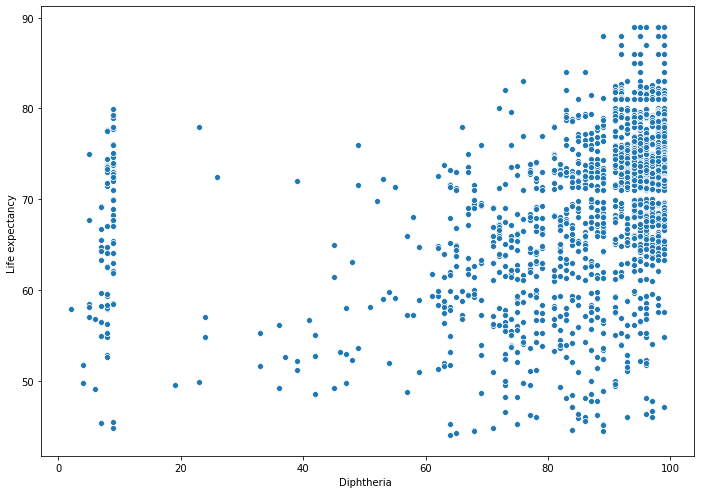

In [5]:

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.scatterplot(data=df1,x="Diphtheria ",y="Life expectancy ")

As we can see there is a positive correlation but it is quite a weak one

Now let us do the same analysis for say, schooling

In [6]:
df2=df.copy()
df["Schooling"].replace("",np.nan)
df2.dropna(inplace=True)

In [7]:
df2.shape

(1649, 22)

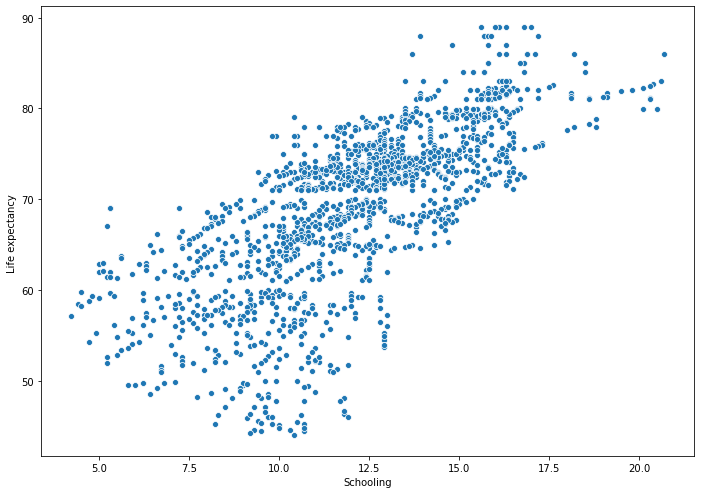

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.scatterplot(data=df1,x="Schooling",y="Life expectancy ")

As we can see there is a strong positive correlation between the average schooling of a country and the life expectancy

Now let us see what the increase in these vaccinations has done to the life expectancies of countries

In [9]:
df_2000=df[df["Year"]==2000]
df_2000.reset_index(inplace=True)

In [10]:
df_2015=df[df["Year"]==2015]
df_2015.reset_index(inplace=True)

In [11]:
s1=df_2000["Country"]
df_2000.drop("Country",axis=1,inplace=True)
df_2000.drop("Status",axis=1,inplace=True)
df_2000

C:\Users\deode\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,index,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,15,2000,54.8,321.0,88,0.01,10.424960,62.0,6532,12.2,...,24.0,8.20,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5
1,31,2000,72.6,11.0,1,3.66,91.711541,96.0,662,45.0,...,97.0,6.26,97.0,0.1,1175.788981,38927.0,2.1,2.2,0.656,10.7
2,47,2000,71.3,145.0,21,0.25,154.455944,NaN,0,44.4,...,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
3,63,2000,45.3,48.0,97,1.85,15.881493,NaN,2219,15.4,...,3.0,2.79,28.0,2.0,555.296942,1644924.0,1.9,1.9,0.382,4.6
4,79,2000,73.6,156.0,0,7.27,1127.743470,NaN,0,38.2,...,96.0,4.13,95.0,0.1,9875.161736,NaN,3.7,3.6,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,2873,2000,72.5,168.0,11,8.01,0.000000,5.0,22,53.4,...,86.0,4.91,77.0,0.1,NaN,NaN,1.8,1.7,0.670,10.6
179,2889,2000,73.4,139.0,33,1.60,0.000000,NaN,16512,9.2,...,96.0,4.89,96.0,0.1,NaN,NaN,15.8,16.4,0.569,10.4
180,2905,2000,68.0,252.0,48,0.07,0.000000,14.0,0,31.2,...,74.0,4.14,74.0,0.1,NaN,NaN,14.1,14.1,0.436,7.7
181,2921,2000,43.8,614.0,44,2.62,45.616880,NaN,30930,16.8,...,85.0,7.16,85.0,18.7,341.955625,1531221.0,7.5,7.5,0.418,9.6


In [12]:

df_2015.drop("Country",axis=1,inplace=True)
df_2015.drop("Status",axis=1,inplace=True)
df_2015

C:\Users\deode\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,index,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,16,2015,77.8,74.0,0,4.60,364.975229,99.0,0,58.0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
2,32,2015,75.6,19.0,21,NaN,0.000000,95.0,63,59.5,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
3,48,2015,52.4,335.0,66,NaN,0.000000,64.0,118,23.3,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
4,64,2015,76.4,13.0,0,NaN,0.000000,99.0,0,47.7,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,2858,2015,74.1,157.0,9,NaN,0.000000,87.0,0,62.1,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
179,2874,2015,76.0,127.0,28,NaN,0.000000,97.0,256,17.5,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
180,2890,2015,65.7,224.0,37,NaN,0.000000,69.0,468,41.3,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
181,2906,2015,61.8,33.0,27,NaN,0.000000,9.0,9,23.4,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [13]:
df_imp=df_2015.subtract(df_2000)
df_imp

,index,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,-15,15,10.2,-58.0,-26,0.00,60.854664,3.0,-5378,6.9,...,-18.0,-0.04,41.0,0.0,469.699210,33442738.0,14.9,14.8,0.141,4.6
1,-15,15,5.2,63.0,-1,0.94,273.263688,3.0,-662,13.0,...,2.0,-0.26,2.0,0.0,2778.438849,-10054.0,-0.9,-0.9,0.106,3.5
2,-15,15,4.3,-126.0,0,NaN,-154.455944,NaN,63,15.1,...,9.0,NaN,9.0,0.0,2375.584950,36753162.0,-0.5,-0.6,0.107,3.7
3,-15,15,7.1,287.0,-31,NaN,-15.881493,NaN,-2101,7.9,...,4.0,NaN,36.0,-0.1,3140.496806,1141011.0,6.4,6.3,0.149,6.8
4,-15,15,2.8,-143.0,0,NaN,-1127.743470,NaN,0,9.5,...,-10.0,NaN,4.0,0.1,3691.792364,NaN,-0.4,-0.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,-15,15,1.6,-11.0,-2,NaN,0.000000,82.0,-22,8.7,...,1.0,NaN,10.0,0.0,NaN,NaN,-0.2,-0.2,0.099,3.7
179,-15,15,2.6,-12.0,-5,NaN,0.000000,NaN,-16256,8.3,...,1.0,NaN,1.0,0.0,NaN,NaN,-1.6,-1.9,0.109,2.2
180,-15,15,-2.3,-28.0,-11,NaN,0.000000,55.0,468,10.1,...,-11.0,NaN,-5.0,0.0,NaN,NaN,-0.5,-0.7,0.063,1.3
181,-15,15,18.0,-581.0,-17,NaN,-45.616880,NaN,-30921,6.6,...,-76.0,NaN,-76.0,-14.6,971.934021,-1369634.0,-1.2,-1.4,0.158,2.9


In [14]:
df_imp["Country"]=s1

In [22]:
df_imp.loc[df_imp["Life expectancy "]==df_imp["Life expectancy "].max()]

,index,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Country
182,-15,15,21.0,-329.0,-2,NaN,0.0,8.0,-1483,6.3,...,NaN,9.0,-37.3,-428.665049,3555200.0,-5.4,-5.7,0.073,0.5,Zimbabwe


As we see the most improvement in life expectancy for a country is that of zimbabwe where the life expectancy has increased by 21 years

In [23]:
df.loc[df["Country"]=="Zimbabwe"]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2922,Zimbabwe,2015,Developing,67.0,336.0,22,NaN,0.000000,87.0,0,...,88.0,NaN,87.0,6.2,118.693830,15777451.0,5.6,5.5,0.507,10.3
2923,Zimbabwe,2014,Developing,59.2,371.0,23,6.50,10.822595,91.0,0,...,92.0,6.44,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3
2924,Zimbabwe,2013,Developing,58.0,399.0,25,6.39,10.666707,95.0,0,...,95.0,6.88,95.0,6.8,111.227396,155456.0,6.2,6.0,0.488,10.4
2925,Zimbabwe,2012,Developing,56.6,429.0,26,6.09,92.602336,97.0,0,...,95.0,6.69,95.0,8.8,955.648466,1471826.0,6.5,6.4,0.464,9.8
2926,Zimbabwe,2011,Developing,54.9,464.0,28,6.00,63.750530,94.0,0,...,93.0,6.31,93.0,13.3,839.927936,14386649.0,6.8,6.7,0.452,10.1
2927,Zimbabwe,2010,Developing,52.4,527.0,29,5.21,53.308581,9.0,9696,...,89.0,5.37,89.0,15.7,713.635620,1486317.0,7.1,7.0,0.436,10.0
2928,Zimbabwe,2009,Developing,50.0,587.0,30,4.64,1.040021,73.0,853,...,69.0,6.26,73.0,18.1,65.824121,1381599.0,7.5,7.4,0.419,9.9
2929,Zimbabwe,2008,Developing,48.2,632.0,30,3.56,20.843429,75.0,0,...,75.0,4.96,75.0,20.5,325.678573,13558469.0,7.8,7.8,0.421,9.7
2930,Zimbabwe,2007,Developing,46.6,67.0,29,3.88,29.814566,72.0,242,...,73.0,4.47,73.0,23.7,396.998217,1332999.0,8.2,8.2,0.414,9.6
2931,Zimbabwe,2006,Developing,45.4,7.0,28,4.57,34.262169,68.0,212,...,71.0,5.12,7.0,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5


As we see the life expectancy for Zimbabwe in 2000 was 46 and in 2015 it was 67

Now let use visualize this in the form of a graph

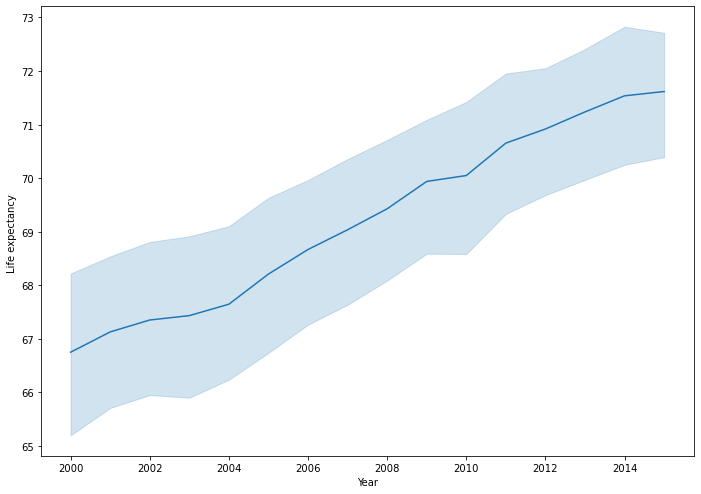

In [29]:
df_zimb=df.loc[df["Country"]=="Zimbabwe"]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.lineplot(data=df,x="Year",y="Life expectancy ")

Now let us visualize the various vaccination data for zimbabwe

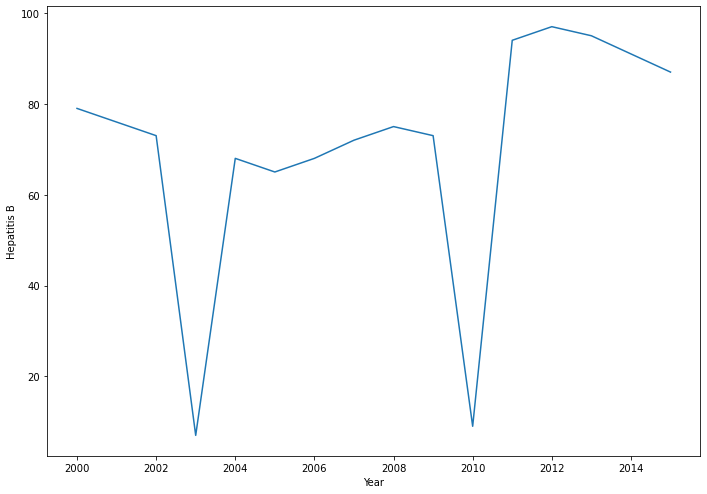

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.lineplot(data=df_zimb,x="Year",y="Hepatitis B")

As we see the Hepatitis Vaccine given as a percentage of people has gradually increased.

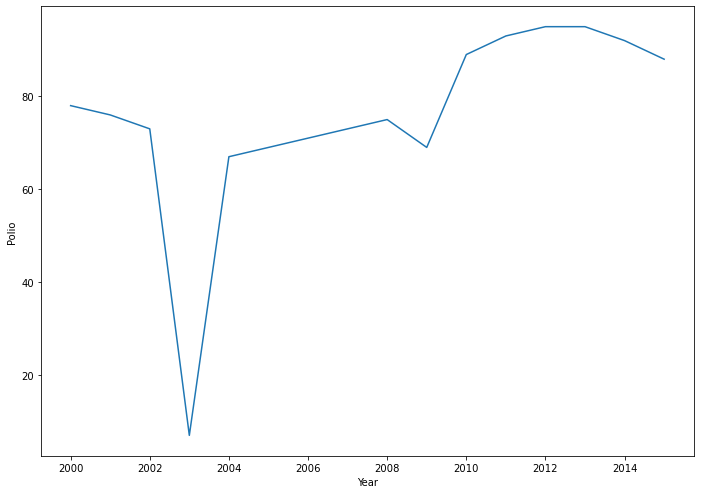

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.lineplot(data=df_zimb,x="Year",y="Polio")

We see a similar case with Polio vaccine

## Wars

In [28]:
df_imp.loc[df_imp["Life expectancy "]==df_imp["Life expectancy "].min()]

,index,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Country
158,-15,15,-8.1,157.0,-4,NaN,-81.727471,-38.0,-101,13.2,...,NaN,-43.0,0.0,NaN,17093139.0,-0.5,-0.5,-0.035,-1.0,Syrian Arab Republic


As we see the life expectancy for the Syrian Arab Republic has dropped the most. It has dropped by 8.1 years.

In [31]:
df.loc[df["Country"]=="Syrian Arab Republic"]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2537,Syrian Arab Republic,2015,Developing,64.5,293.0,6,NaN,0.000000,41.0,45,...,5.0,NaN,41.0,0.1,NaN,18734987.0,6.3,6.1,0.553,9.0
2538,Syrian Arab Republic,2014,Developing,64.4,294.0,7,0.01,0.000000,47.0,594,...,52.0,3.25,43.0,0.1,NaN,19239.0,6.3,6.1,0.575,9.0
2539,Syrian Arab Republic,2013,Developing,63.6,37.0,7,0.01,0.000000,71.0,740,...,5.0,3.25,41.0,0.1,NaN,1989141.0,6.3,6.1,0.635,13.0
2540,Syrian Arab Republic,2012,Developing,62.8,32.0,7,0.01,0.000000,43.0,13,...,47.0,3.25,45.0,0.1,NaN,24271.0,6.3,6.1,0.645,12.5
2541,Syrian Arab Republic,2011,Developing,71.7,163.0,7,0.76,0.000000,66.0,13,...,6.0,3.23,72.0,0.1,NaN,2863993.0,6.3,6.1,0.646,12.0
2542,Syrian Arab Republic,2010,Developing,73.7,127.0,7,0.78,0.000000,84.0,26,...,83.0,3.28,8.0,0.1,NaN,2118834.0,6.4,6.1,0.650,11.7
2543,Syrian Arab Republic,2009,Developing,73.8,124.0,7,0.81,0.000000,84.0,22,...,83.0,3.55,8.0,0.1,NaN,2824893.0,6.4,6.2,0.648,11.8
2544,Syrian Arab Republic,2008,Developing,73.8,122.0,8,0.80,0.000000,83.0,19,...,83.0,3.40,79.0,0.1,NaN,2325443.0,6.4,6.2,0.651,11.6
2545,Syrian Arab Republic,2007,Developing,73.8,121.0,8,0.83,17.981362,83.0,403,...,83.0,3.72,8.0,0.1,258.352900,1963286.0,6.4,6.2,0.644,11.5
2546,Syrian Arab Republic,2006,Developing,73.7,123.0,8,0.97,122.652333,83.0,517,...,83.0,3.78,8.0,0.1,1762.246170,18914977.0,6.4,6.3,0.636,11.4


As we see the life expectancy for the Syrian Arab Republic was increasing at first but then plummeted drastically

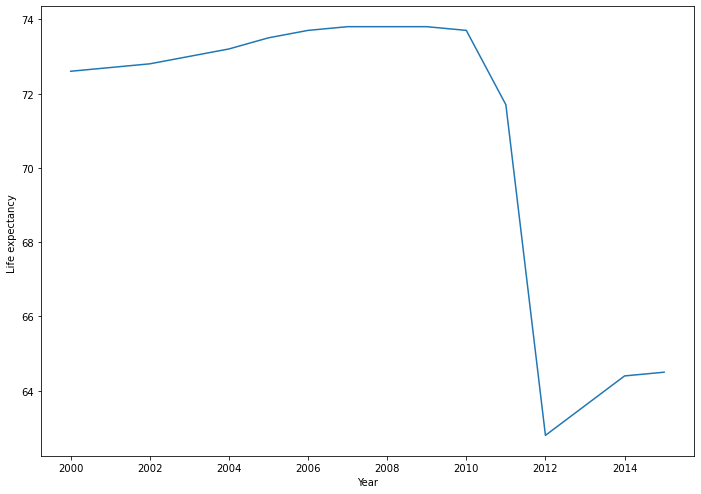

In [34]:
df_syr=df.loc[df["Country"]=="Syrian Arab Republic"]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.lineplot(data=df_syr,x="Year",y="Life expectancy ")

As we see there is a huge drop in Life expectancy in the year 2012.
This is because of the Syrian war which started in 2011 and has led to the death of hundreds of thousands of people in Syria and has led to a drastic decrease in the Life expectancy.